In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=",")
df.shape

(3376, 46)

In [49]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [50]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

OSEBuildingID - 0%
DataYear - 0%
BuildingType - 0%
PrimaryPropertyType - 0%
PropertyName - 0%
Address - 0%
City - 0%
State - 0%
ZipCode - 0%
TaxParcelIdentificationNumber - 0%
CouncilDistrictCode - 0%
Neighborhood - 0%
Latitude - 0%
Longitude - 0%
YearBuilt - 0%
NumberofBuildings - 0%
NumberofFloors - 0%
PropertyGFATotal - 0%
PropertyGFAParking - 0%
PropertyGFABuilding(s) - 0%
ListOfAllPropertyUseTypes - 0%
LargestPropertyUseType - 1%
LargestPropertyUseTypeGFA - 1%
SecondLargestPropertyUseType - 50%
SecondLargestPropertyUseTypeGFA - 50%
ThirdLargestPropertyUseType - 82%
ThirdLargestPropertyUseTypeGFA - 82%
YearsENERGYSTARCertified - 96%
ENERGYSTARScore - 25%
SiteEUI(kBtu/sf) - 0%
SiteEUIWN(kBtu/sf) - 0%
SourceEUI(kBtu/sf) - 0%
SourceEUIWN(kBtu/sf) - 0%
SiteEnergyUse(kBtu) - 0%
SiteEnergyUseWN(kBtu) - 0%
SteamUse(kBtu) - 0%
Electricity(kWh) - 0%
Electricity(kBtu) - 0%
NaturalGas(therms) - 0%
NaturalGas(kBtu) - 0%
DefaultData - 0%
Comments - 100%
ComplianceStatus - 0%
Outlier - 99%
Total

In [19]:
df['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [20]:
df = df[df['Outlier'] != 'High outlier']

In [21]:
df.shape

(3367, 46)

In [22]:
df = df[df['Outlier'] != 'Low outlier']

In [23]:
df.shape

(3344, 46)

In [24]:
# select numeric columns
data_numeric = df.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print(numeric_cols)

# select non numeric columns
data_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

['OSEBuildingID' 'DataYear' 'ZipCode' 'CouncilDistrictCode' 'Latitude'
 'Longitude' 'YearBuilt' 'NumberofBuildings' 'NumberofFloors'
 'PropertyGFATotal' 'PropertyGFAParking' 'PropertyGFABuilding(s)'
 'LargestPropertyUseTypeGFA' 'SecondLargestPropertyUseTypeGFA'
 'ThirdLargestPropertyUseTypeGFA' 'ENERGYSTARScore' 'SiteEUI(kBtu/sf)'
 'SiteEUIWN(kBtu/sf)' 'SourceEUI(kBtu/sf)' 'SourceEUIWN(kBtu/sf)'
 'SiteEnergyUse(kBtu)' 'SiteEnergyUseWN(kBtu)' 'SteamUse(kBtu)'
 'Electricity(kWh)' 'Electricity(kBtu)' 'NaturalGas(therms)'
 'NaturalGas(kBtu)' 'Comments' 'TotalGHGEmissions' 'GHGEmissionsIntensity']


In [25]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3344.000000,3344.0,3328.000000,3344.000000,3344.000000,3344.000000,3344.000000,3336.000000,3344.000000,3.344000e+03,...,3.339000e+03,3.338000e+03,3.335000e+03,3.335000e+03,3.335000e+03,3.335000e+03,3.335000e+03,0.0,3335.000000,3335.000000
mean,21188.288876,2016.0,98116.984375,4.444976,47.624216,-122.334741,1968.745813,1.106415,4.715311,9.522665e+04,...,5.414823e+06,5.285707e+06,2.746206e+05,1.088730e+06,3.714747e+06,1.374779e+04,1.374779e+06,NaN,120.108843,1.174963
std,12229.772762,0.0,18.672612,2.117677,0.047813,0.027195,33.005479,2.117339,5.506665,2.198061e+05,...,2.169684e+07,1.599148e+07,3.928102e+06,4.366981e+06,1.490014e+07,6.739079e+04,6.739079e+06,NaN,541.164241,1.813405
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19989.500000,2016.0,98105.000000,3.000000,47.600180,-122.350552,1948.750000,1.000000,2.000000,2.852325e+04,...,9.351888e+05,9.832379e+05,0.000000e+00,1.887718e+05,6.440895e+05,0.000000e+00,0.000000e+00,NaN,9.655000,0.210000
50%,23108.500000,2016.0,98115.000000,4.000000,47.618875,-122.332475,1975.000000,1.000000,4.000000,4.429100e+04,...,1.809102e+06,1.914797e+06,0.000000e+00,3.467298e+05,1.183042e+06,3.294022e+03,3.294020e+05,NaN,34.110000,0.620000
75%,25992.500000,2016.0,98122.000000,7.000000,47.657293,-122.319345,1997.000000,1.000000,5.000000,9.115075e+04,...,4.218830e+06,4.379956e+06,0.000000e+00,8.310218e+05,2.835446e+06,1.193213e+04,1.193214e+06,NaN,94.015000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [26]:
df['GHGEmissionsIntensity'][df['GHGEmissionsIntensity'] < 0 ] = 0
print(df['GHGEmissionsIntensity'][3206])

0.0


In [27]:
df['Electricity(kWh)'][df['Electricity(kWh)'] < 0 ] = 0
print(df['Electricity(kWh)'][3206])

0.0


In [28]:
index = df['Electricity(kBtu)'][df['Electricity(kBtu)'] < 0 ].index.item()
df.loc[index, ('Electricity(kBtu)')] = 0
print(df['Electricity(kBtu)'][index])

0.0


Environs 10% des donnees de PropertyGFATotal sont des Outliers selon le boxplot

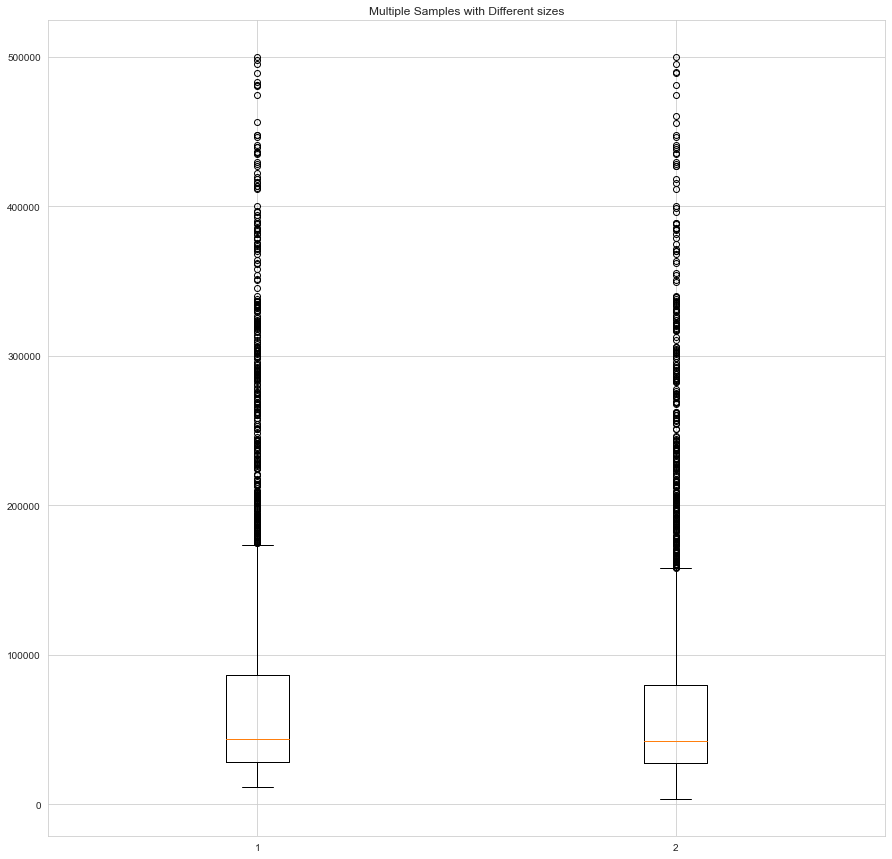

In [29]:
data = [df['PropertyGFATotal'][df['PropertyGFATotal'] < 500000], df['PropertyGFABuilding(s)'][df['PropertyGFABuilding(s)'] < 500000]]
fig7, ax7 = plt.subplots(figsize=(15,15))
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()

In [30]:
((df['ComplianceStatus'][df['ComplianceStatus'] == 'Non-Compliant']).count() / df['ComplianceStatus'].count() ) * 100

0.20933014354066987

0.2% des batiments sont non-compliant avec les energy benchmarking requirements, nous allons donc retire ces batiments de l'analyse:

In [31]:
df = df[~(df['ComplianceStatus'] == 'Non-Compliant')]
df.shape

(3337, 46)

In [56]:
def clean_multifamily(dataframe):
    for value in dataframe['PrimaryPropertyType']:
        if('Multifamily' in value):
            dataframe['PrimaryPropertyType'].drop(value, axis=0)

In [89]:
df[~df['BuildingType'].str.contains("Multifamily")]


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,0.0,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,0.0,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,0.0,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,0.0,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,0.0,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,0.0,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,0.0,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,0.0,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,0.0,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,0.0,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,0.0,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,0.0,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,0.0,Compliant,NaN,22.11,1.57


Retirer les batiments d'habitation

In [55]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [39]:
def clean_nan(dataframe):
    data_numeric = dataframe.select_dtypes(include=[np.number])
    numeric_cols = data_numeric.columns.values

    data_non_numeric = dataframe.select_dtypes(exclude=[np.number])
    non_numeric_cols = data_non_numeric.columns.values

    for col in numeric_cols:
        if col not in ['SecondLargestPropertyUseType','ZipCode','DataYear','YearBuilt','Latitude','Longitude','CouncilDistrictCode','OSEBuildingID', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','Comments','ThirdLargestPropertyUseTypeGFA']:
            print(col)
            df_wth_nan = dataframe[col].dropna()
            median = df_wth_nan.median();
            dataframe[col] = dataframe[col].fillna(median)
        else:
            print(col)
            dataframe[col] = dataframe[col].fillna(0)
    for col in non_numeric_cols:
        if col == 'ListOfAllPropertyUseTypes':
            for i in dataframe.index:
                dataframe[col]= dataframe[col].apply(
                lambda x: dataframe['PrimaryPropertyType'].iloc(i)
                if pd.isna(x)
                else x)
        if col == 'LargestPropertyUseType':
            for i in dataframe.index:
                dataframe[col]= dataframe[col].apply(
                    lambda x: dataframe['PrimaryPropertyType'].iloc(i)
                    if pd.isna(x)
                    else x)

In [40]:
clean_nan(df)

OSEBuildingID
DataYear
ZipCode
CouncilDistrictCode
Latitude
Longitude
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
LargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
Comments
TotalGHGEmissions
GHGEmissionsIntensity


In [34]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print('{} - {}%'.format(col, pct_missing*100))

OSEBuildingID - 0.0%
DataYear - 0.0%
BuildingType - 0.0%
PrimaryPropertyType - 0.0%
PropertyName - 0.0%
Address - 0.0%
City - 0.0%
State - 0.0%
ZipCode - 0.0%
TaxParcelIdentificationNumber - 0.0%
CouncilDistrictCode - 0.0%
Neighborhood - 0.0%
Latitude - 0.0%
Longitude - 0.0%
YearBuilt - 0.0%
NumberofBuildings - 0.0%
NumberofFloors - 0.0%
PropertyGFATotal - 0.0%
PropertyGFAParking - 0.0%
PropertyGFABuilding(s) - 0.0%
ListOfAllPropertyUseTypes - 0.0%
LargestPropertyUseType - 0.0%
LargestPropertyUseTypeGFA - 0.0%
SecondLargestPropertyUseType - 50.194785735690736%
SecondLargestPropertyUseTypeGFA - 0.0%
ThirdLargestPropertyUseType - 82.34941564279292%
ThirdLargestPropertyUseTypeGFA - 0.0%
YearsENERGYSTARCertified - 96.43392268504644%
ENERGYSTARScore - 0.0%
SiteEUI(kBtu/sf) - 0.0%
SiteEUIWN(kBtu/sf) - 0.0%
SourceEUI(kBtu/sf) - 0.0%
SourceEUIWN(kBtu/sf) - 0.0%
SiteEnergyUse(kBtu) - 0.0%
SiteEnergyUseWN(kBtu) - 0.0%
SteamUse(kBtu) - 0.0%
Electricity(kWh) - 0.0%
Electricity(kBtu) - 0.0%
Natural

Nous allons separer les variables independantes (labels) de la variable target:

In [35]:
data = df.drop(labels=['TotalGHGEmissions', 'GHGEmissionsIntensity','SiteEUI(kBtu/sf)',
                       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)','DataYear','Address', 'City', 'State', 'ZipCode',
                       'TaxParcelIdentificationNumber','PropertyGFABuilding(s)','YearsENERGYSTARCertified','Comments', 'ComplianceStatus','Outlier', 'DefaultData','SecondLargestPropertyUseTypeGFA','SecondLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','PropertyName','Neighborhood','ListOfAllPropertyUseTypes','PrimaryPropertyType','LargestPropertyUseType','Electricity(kWh)','NaturalGas(therms)'], axis=1, inplace=False)

In [36]:
target1_siteEUI = df['SiteEUI(kBtu/sf)']

target2_siteEUIWN = df['SiteEUIWN(kBtu/sf)']

target3_sourceEUI = df['SourceEUI(kBtu/sf)']

target4_sourceEUIWN = df['SourceEUIWN(kBtu/sf)']

target5_siteEnergyuse = df['SiteEnergyUse(kBtu)']

target6_siteEnergyuse = df['SiteEnergyUseWN(kBtu)']

target7_totalGHGemissions = df['TotalGHGEmissions']

target8_GHGemissionIntensity = df['GHGEmissionsIntensity']


In [53]:
fig = px.scatter_mapbox(df,lat='Latitude',lon='Longitude', hover_name="PrimaryPropertyType", hover_data=['YearBuilt','PropertyGFATotal','GHGEmissionsIntensity'],color_discrete_sequence=[df['SiteEnergyUseWN(kBtu)']], size="SiteEnergyUseWN(kBtu)",size_max=30, height=600, zoom=10)
fig.update_layout(title = 'Seattle map', title_x=0.5)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [41]:
fig = px.scatter_mapbox(df,lat='Latitude',lon='Longitude', hover_name='SiteEnergyUseWN(kBtu)', hover_data=['YearBuilt','GHGEmissionsIntensity','PropertyGFATotal','LargestPropertyUseType','SiteEnergyUse(kBtu)'],color_discrete_sequence=[df['CouncilDistrictCode']], height=600,size="SiteEnergyUseWN(kBtu)", size_max=50,zoom=12)
fig.update_layout(title = 'Seattle map', title_x=0.5)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

TypeError: Object of type _iLocIndexer is not JSON serializable